#                                                                                               The Sparks Foundation Intership June 2022

# *# Task 1 : Prediction using Supervised ML*
Author : Benjarnij Hajar


link of dataset 

```
[http://bit.ly/w-data]
```


*  The objectif of this task is to predict the score student for a nombre of hours studies

# Importing libraries

In [1]:
# importing packages
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Read the csv dataset as a pandas dataframe

In [4]:
data=pd.read_csv("/content/student_score.csv")
data.head(6)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20


In [7]:
# Nomber of rows and columns of the dataset
data.shape

(25, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# Statistics information

In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Visualize the dataset

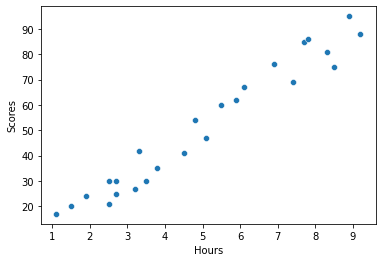

In [8]:
sns.scatterplot(x=data['Hours'], y=data['Scores']);   # plot the dataset : score fonction of nombre of houres study

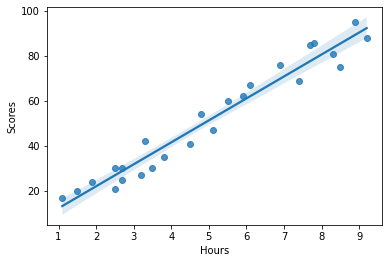

In [9]:
sns.regplot(x=data['Hours'], y=data['Scores']);  # regression plot gives a better and clear visualization for such data

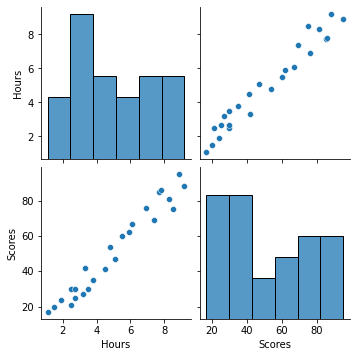

In [10]:
sns.pairplot(data)

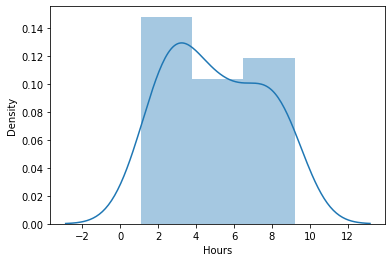

In [16]:
sns.distplot(data['Hours'])  # Hours variables changement

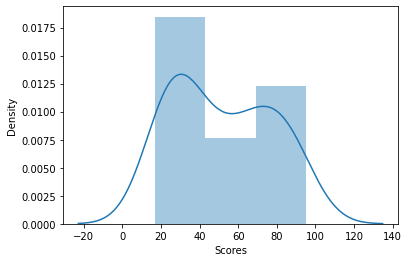

In [18]:
sns.distplot(data['Scores'])  # Hours variables changement

# Separate target and data

In [20]:
data_target=data.drop(columns='Scores')
target=data['Scores']

In [22]:
data_target.head(6)

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5
5,1.5


In [23]:
target.head(6)

0    21
1    47
2    27
3    75
4    30
5    20
Name: Scores, dtype: int64

# Train and Test Split

In [24]:
from sklearn.model_selection import train_test_split

train_X, val_X, train_y, val_y = train_test_split(data_target,target, random_state = 0)

# Model Building


In [25]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(train_X, train_y)   ## train the model


LinearRegression()

In [27]:
prediction = regressor.predict(val_X) ## prediction
prediction

array([16.84472176, 33.74557494, 75.50062397, 26.7864001 , 60.58810646,
       39.71058194, 20.8213931 ])

In [28]:
pd.DataFrame({'Actual': val_y, 'Predicted': prediction})  ## view actual and predicted on test set side-by-side

,Actual,Predicted
5,20,16.844722
2,27,33.745575
19,69,75.500624
16,30,26.786400
11,62,60.588106
22,35,39.710582
17,24,20.821393


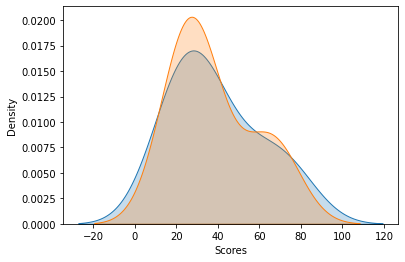

In [29]:
## Actual vs Predicted distribution plot 

sns.kdeplot(prediction,label="Predicted", shade=True);

sns.kdeplot(data=val_y, label="Actual", shade=True);

In [31]:
# Predict percent for custom input value for hours
# Question : What will be predicted score if a student studies for 9.25 hrs/ day? 

h = [[9.25]]
s = regressor.predict(h)
print('A student who studies ', h[0][0] , ' hours/day is estimated to score ', s[0])

A student who studies  9.25  hours/day is estimated to score  93.89272889341652
